<a href="https://colab.research.google.com/github/junweiluo/HandsonMLPractice/blob/master/Chapter14Ex06_Conv_Transpose_Fully_Convolutional_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

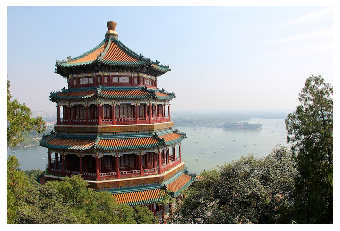

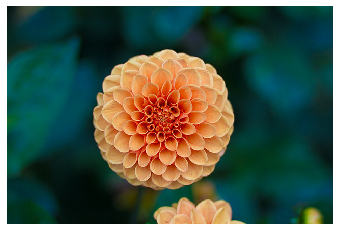

In [3]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
# original pictures
plot_color_image(images[0])
plt.show()
plot_color_image(images[1])
plt.show()

In [4]:
tf.random.set_seed(42)

china_box = [0, 0.03, 1, 0.68]
flower_box = [0.19, 0.26, 0.86, 0.7]
images_resized = tf.image.crop_and_resize(images, [china_box, flower_box], [0, 1], [224, 224])
X = images_resized.numpy()

X.shape # original size

(2, 224, 224, 3)

In [5]:
# We can assume this is to replace a Flatten layer usually at the last of CNN.
# Thus this layer can help build a fully convolutional Networks

conv_transpose = keras.layers.Conv2DTranspose(filters=5, kernel_size=2, strides=2, padding="VALID")
output = conv_transpose(X)
output.shape

TensorShape([2, 448, 448, 5])

In [0]:
# It is hard to run the session below.  Using all available RAM.

conv_transpose = keras.layers.Conv2DTranspose(filters=80, kernel_size=200, strides=1, padding="VALID")
output2 = conv_transpose(X)
output2.shape